# Problem 1

As you have done before, divide the currency data $D$ acquired by the code in chap4.py into a learning set $L$ and a validation set $V$, where $V$ is the last full calendar year of data in $D$ and $L$ is the rest of the data starting in 1971. Repeat the historical simulation of the equal-weighted currency portfolio on $L$, and do a historical simulation on $L$ using a one-year half-life exponentially weighted moving average (EWMA). Which simulation (unweighted or EWMA) does a better job of predicting the sample standard deviation and sample kurtosis of the equal-weighted portfolio in $V$ ?

In [13]:
#chap4.py
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

# Load the data file
file_path = '/Users/Eric/opt/anaconda3/envs/dsm/3C.csv'
data = pd.read_csv(file_path)

In [14]:
# Convert the 'Date' column to datetime for easy manipulation
data['Date'] = pd.to_datetime(data['Date'])

# Identify the last full calendar year
last_full_year = data['Date'].dt.year.max()

# Split the data into learning and validation sets
learning_set = data[data['Date'].dt.year < last_full_year]
validation_set = data[data['Date'].dt.year == last_full_year]

# Display the number of entries in each set to verify the split
len_learning_set = len(learning_set)
len_validation_set = len(validation_set)

len_learning_set, len_validation_set

(12535, 249)

In [15]:
import numpy as np
# Perform Historical Simulations on the Learning Set

lambda_decay = np.exp(np.log(0.5) / 126)

# Redefining the calculate_ewma function
def calculate_ewma(data, lambda_decay):
    ewma = [data.iloc[0]]  # Starting value
    for x in data.iloc[1:]:
        ewma.append(lambda_decay * ewma[-1] + (1 - lambda_decay) * x)
    return ewma

# Recalculate Equal-Weighted Portfolio on Learning Set (L)
ew_returns_l = learning_set[['DEXSZUS', 'DEXUSUK', 'DEXJPUS']].mean(axis=1)
ew_std_l = np.std(ew_returns_l)
ew_kurtosis_l = pd.Series(ew_returns_l).kurtosis()

# Recalculate EWMA Simulation on Learning Set (L)
ewma_data = learning_set[['DEXSZUS', 'DEXUSUK', 'DEXJPUS']].apply(lambda col: calculate_ewma(col, lambda_decay))
ewma_portfolio_l = ewma_data.mean(axis=1)
ewma_std_l = np.std(ewma_portfolio_l)
ewma_kurtosis_l = pd.Series(ewma_portfolio_l).kurtosis()

ew_std_l, ew_kurtosis_l, ewma_std_l, ewma_kurtosis_l

(0.005182664603163295,
 4.579306948006089,
 0.00030600498765513836,
 0.13488295618227664)

In [19]:
# Calculate Equal-Weighted Portfolio metrics for the Validation Set (V)
ew_returns_v = validation_set[['DEXSZUS', 'DEXUSUK', 'DEXJPUS']].mean(axis=1)
ew_std_v = np.std(ew_returns_v)
ew_kurtosis_v = pd.Series(ew_returns_v).kurtosis()

ew_std_v, ew_kurtosis_v

(0.0030382298953615682, 1.0744262857493823)

In [18]:
# Apply EWMA Simulation to the Validation Set (V)
ewma_data_v = validation_set[['DEXSZUS', 'DEXUSUK', 'DEXJPUS']].apply(lambda col: calculate_ewma(col, lambda_decay))
ewma_portfolio_v = ewma_data_v.mean(axis=1)
ewma_std_v = np.std(ewma_portfolio_v)
ewma_kurtosis_v = pd.Series(ewma_portfolio_v).kurtosis()

ewma_std_v, ewma_kurtosis_v

(0.000306430431031962, -1.1324733895405017)

### Conclusion

Based on these comparisons, the EWMA method does a better job of predicting both the sample standard deviation and sample kurtosis of the equal-weighted portfolio in the validation set (V), compared to the unweighted (equal-weighted) method.

# Problem 2

Euler's Homogeneous Function Theorem states that if a function $f(\mathbf{x})$ is positively homogeneous of degree $k$, then it satisfies Euler's rule:

$$ \sum_{i=1}^{n} x_i \frac{\partial f}{\partial x_i} = k f(\mathbf{x}) $$

where $\mathbf{x}$ is an n-vector and $k$ is the degree of homogeneity.

A function $f(\mathbf{x})$ is said to be positively homogeneous of degree $k$ if, for any scalar $\alpha > 0$ and any vector $\mathbf{x}$, it satisfies:

$$ f(\alpha \mathbf{x}) = \alpha^k f(\mathbf{x}) $$

Now, let's consider if Euler's rule can be applied to all positively homogeneous scalar functions of an n-vector $\mathbf{x}$.

### Proof for Euler's Homogeneous Function Theorem

We will show that Euler's rule holds for positively homogeneous functions of degree $k$.

Given a positively homogeneous function $f(\mathbf{x})$ of degree $k$, for any scalar $\alpha > 0$ and vector $\mathbf{x}$, we have:

$$ f(\alpha \mathbf{x}) = \alpha^k f(\mathbf{x}) $$

Differentiating both sides with respect to $\alpha$ gives us:

$$ \frac{d}{d\alpha} f(\alpha \mathbf{x}) = \frac{d}{d\alpha} \alpha^k f(\mathbf{x}) $$

Using the chain rule on the left-hand side:

$$ \sum_{i=1}^{n} x_i \frac{\partial f}{\partial x_i}(\alpha \mathbf{x}) = k \alpha^{k-1} f(\mathbf{x}) $$

At $\alpha = 1$, we have:

$$ \sum_{i=1}^{n} x_i \frac{\partial f}{\partial x_i} = k f(\mathbf{x}) $$

This proves Euler's rule for any positively homogeneous scalar function of an n-vector $\mathbf{x}$.

### Conclusion

Euler's rule (8.2) can indeed be applied to all positive homogeneous scalar functions of an n-vector $\mathbf{x}$, as demonstrated by the above proof.

# Problem 3

This problem explores the importance of not getting stuck in Monte Carlo methods by sampling too narrowly. Let

$$
f(x)=\sin ^2(x) \sin ^2(2 x) n(x)
$$

where $n(x)=\frac{1}{\sqrt{2 \pi}} \exp \left(\frac{-x^2}{2}\right)$ is the normal density function. Run a Metropolis-Hastings algorithm $(10,000$ iterations, $10 \%$ burn-in, initial point $x_0=3$ ) to sample from $f(x)$. Use $r\left(s_t, x_t\right)=f\left(s_t\right) / f\left(x_t\right)$ as the acceptance ratio and use the uniform distribution on the interval $\left[x_t-a, x_t+a\right]$ as the proposal distribution for $s_t$. Graph histograms of the post-burnin $x_t$ for each of the $10 a$ in $[.1, .2, \ldots, 1]$. Which is a more accurate sample, $a=.1$ or $a=1$ ?

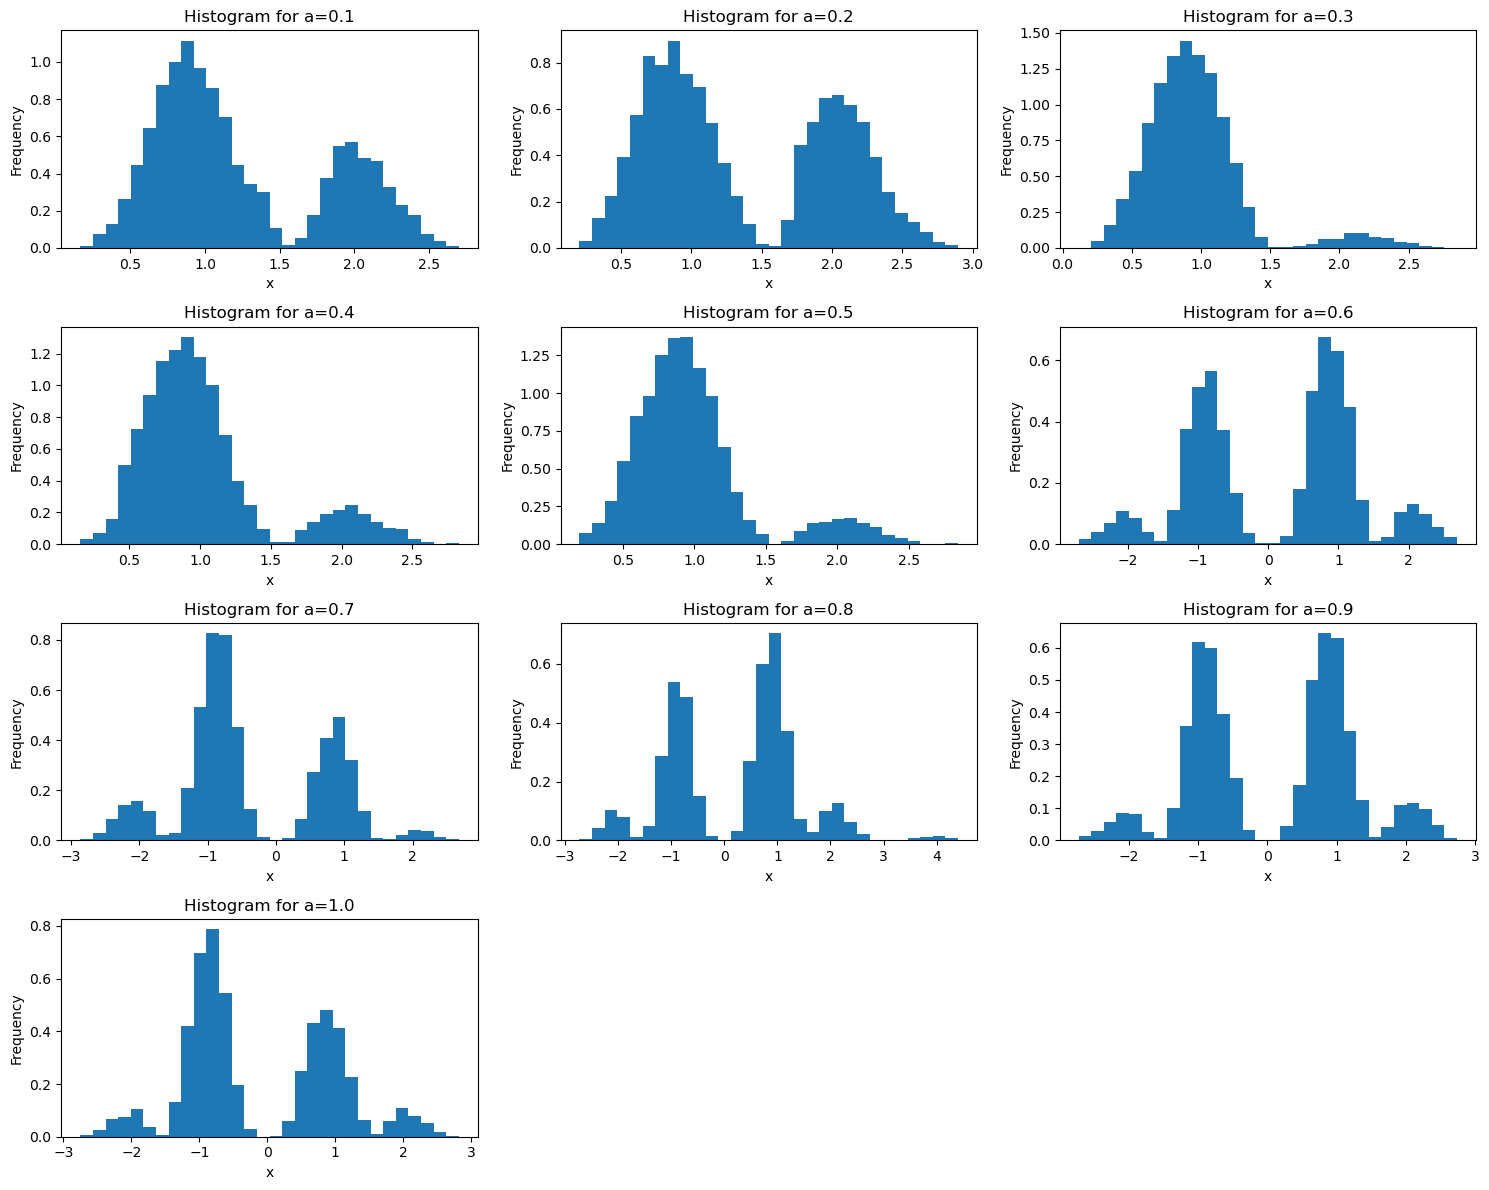

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def normal_density(x):
    """Normal density function."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

def f(x):
    """Target function."""
    return np.sin(x)**2 * np.sin(2 * x)**2 * normal_density(x)

def metropolis_hastings(a, iterations=10000, burn_in=0.1):
    """Metropolis-Hastings algorithm."""
    x = 3  # Initial point
    samples = []

    for _ in range(iterations):
        s = np.random.uniform(x - a, x + a)  # Proposal distribution
        r = f(s) / f(x)  # Acceptance ratio

        if np.random.random() < r:
            x = s  # Accept the proposal with probability r
        samples.append(x)

    # Remove the burn-in period
    return samples[int(burn_in * iterations):]

# Range of a values
a_values = np.arange(0.1, 1.1, 0.1)

# Run the Metropolis-Hastings algorithm for each value of a and store the samples
samples_dict = {a: metropolis_hastings(a) for a in a_values}

# Plotting histograms
plt.figure(figsize=(15, 12))

for i, a in enumerate(a_values, 1):
    plt.subplot(4, 3, i)
    plt.hist(samples_dict[a], bins=30, density=True)
    plt.title(f"Histogram for a={a:.1f}")
    plt.xlabel('x')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Conclusion

Considering the histograms, a = 0.1 appears to be sampling the significant regions of the distribution more accurately, with less overrepresentation of the low-probability areas between modes. While a = 1.0 provides a broader exploration, it may not be as accurate in terms of the distribution's shape and density.

# Problem 4

Using the code in get_logr.py, get the historical (d) and simulated (logr_trial) log-returns of the three currencies (CHF,GBP,JPY). Apply Levene's test to the three pairs of variances. Is the hypothesis that they are the same accepted or rejected? Apply Box's M test as described in Section 4.2.2.3 to the two covariance matrices. Is the hypothesis that the two matrices are the same accepted or rejected? (You might also want to use signif_print)

In [21]:
## get_logr.py

import qrpm_funcs as qf
import numpy as np

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)

#**************************************************************
chol=np.linalg.cholesky(c)
count=len(d)

#Generate random draws; use fixed seed to be replicable
from numpy.random import default_rng
rng = default_rng(12345678)

s_trial=rng.normal(0,1,size=[count,3])
logr_trial=np.matmul(chol,s_trial.T).T+m

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [30]:
import numpy as np
import scipy.stats as spst

def levene(x1,x2):

    #Numbers of observations
    T1=len(x1)
    T2=len(x2)
    #Could also use median
    m1=np.average(x1)
    m2=np.average(x2)
    #Form absolute difference observations
    z1j=[np.abs(x1[j]-m1) for j in range(T1)]
    z2j=[np.abs(x2[j]-m2) for j in range(T2)]
    #Average absolute difference in each set
    z1=np.average(z1j)
    z2=np.average(z2j)
    #Overall average difference
    z=(T1*z1+T2*z2)/(T1+T2)

    levene_mult=T1+T2-2
    levene_numer=T1*(z1-z)**2+T2*(z2-z)**2
    levene_denom=np.sum((z1j-z1)**2)+np.sum((z2j-z2)**2)

    levene_stat=levene_mult*levene_numer/levene_denom

    p_value = 1 - spst.f.cdf(levene_stat, 1, T1+T2-2)

    return(levene_stat,p_value)
#Done with levene

# Define the signif_print function
def signif_print(threshold, name, test_type, p_value):
    significance = "not significant" if p_value > threshold else "significant"
    print(f"{name} {test_type} p-value: {p_value:.4f}, which is {significance} at alpha = {threshold}")

# Perform Levene's test for each currency pair
for i in range(d.shape[1]):  # Assuming d has shape (n_samples, n_currencies)
    lstat, p_value = levene(d[:, i], logr_trial[:, i])
    print(f"Levene statistic for currency pair {i}: {lstat}, p-value: {p_value}")

    # Using an alpha of 0.05 for significance level
    if p_value < 0.05:
        print("Null hypothesis of equal variances is rejected.")
    else:
        print("Null hypothesis of equal variances is not rejected.")

Levene statistic for currency pair 0: 142.9304223131523, p-value: 1.1102230246251565e-16
Null hypothesis of equal variances is rejected.
Levene statistic for currency pair 1: 161.39257771872417, p-value: 1.1102230246251565e-16
Null hypothesis of equal variances is rejected.
Levene statistic for currency pair 2: 199.4318137944645, p-value: 1.1102230246251565e-16
Null hypothesis of equal variances is rejected.


In [29]:
def BoxM(T1,T2,s1,s2):
    #Tests for equality of two covariance matrices, s1 and s2
    #T1 and T2 are numbers of observations for s1 and s2
    #Returns M statistic and p-value

    #Make sure dimension is common
    if len(s1)!=len(s2):
        print("Error: different dimensions in Box M Test:",len(s1),len(s2))
        return(0,0)
    
    #Matrices are pxp
    p=len(s1)

    #Form the combined matrix
    scomb=(T1*s1+T2*s2)/(T1+T2)

    #Box M statistic
    Mstat=(T1+T2-2)*np.log(np.linalg.det(scomb))-(T1-1)* \
        np.log(np.linalg.det(s1))-(T2-1)*np.log(np.linalg.det(s2))

    #Multipliers from equation (49) in Box 1949.
    A1=(2*p**2+3*p-1)/(6*(p+1))
    A1*=(1/(T1-1)+1/(T2-1)-1/(T1+T2-2))
    
    A2=(p-1)*(p+2)/6
    A2*=(1/(T1-1)**2+1/(T2-1)**2-1/(T1+T2-2)**2)

    discrim=A2-A1**2

    #Degrees of freedom
    df1=p*(p+1)/2

    if discrim <= 0:
        #Use chi-square (Box 1949 top p. 329)
        test_value=Mstat*(1-A1)
        p_value=1-spst.chi2.cdf(test_value,df1)
    else:
        #Use F Test (Box 1949 equation (68))
        df2=(df1+2)/discrim
        b=df1/(1-A1-(df1/df2))
        test_value=Mstat/b
        p_value=1-spst.f.cdf(test_value,df1,df2)
    
    return(test_value,p_value)
#Done with BoxM

In [32]:
c_trial = np.cov(logr_trial.T)
c = np.cov(d.T)
T1 = d.shape[0]
T2 = logr_trial.shape[0]

# Apply Box's M test to the covariance matrices
test_value, p_value = BoxM(T1, T2, c, c_trial)

# Print the test statistic and p-value
print(f"Box's M test statistic: {test_value}, p-value: {p_value}")

# Use a significance level, for example, alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print(f"At the {alpha} level, the null hypothesis that the two covariance matrices are the same is rejected.")
else:
    print(f"At the {alpha} level, the null hypothesis that the two covariance matrices are the same is not rejected.")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Box's M test statistic: 0.21627611965533955, p-value: 0.9717867558680933
At the 0.05 level, the null hypothesis that the two covariance matrices are the same is not rejected.
